<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/extra_bits_and_bytes_for_midterm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

### **Linear Relationship**

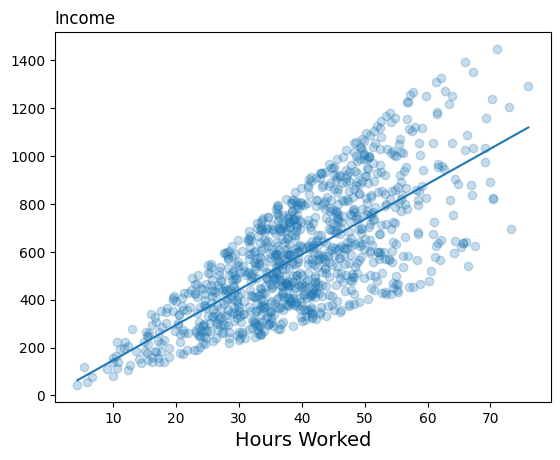

In [29]:
def sample(key):
  k1, k2 = jax.random.split(key)
  hourly_wage = jax.random.uniform(k1, minval=7.50, maxval=22.0)
  hours = jnp.maximum(40 + 12*jax.random.normal(k2,), 0)
  return hours, hours*hourly_wage

key = jax.random.PRNGKey(0)
xs, ys = jax.vmap(sample)(jax.random.split(key, 1000))
xs = xs.reshape(-1,1)
ys = ys.reshape(-1,1)
regs = jnp.hstack((xs, jnp.ones_like(xs)))
coeffs = jnp.linalg.lstsq(regs, ys)[0]
yhat = regs @ coeffs
sorted_indices = jnp.argsort(xs, axis=0)
xs_sorted = xs[sorted_indices[:, 0]]
yhat_sorted = yhat[sorted_indices[:, 0]]
plt.scatter(xs, ys, alpha=0.25)
plt.plot(xs_sorted, yhat_sorted)
plt.xlabel('Hours Worked', size=14)
plt.title('Income', loc='left')
plt.show()

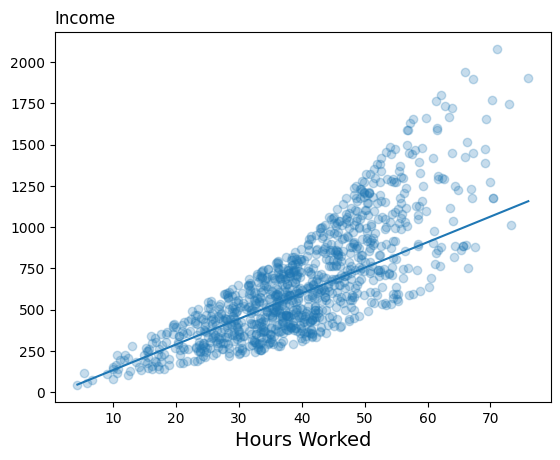

In [45]:
def sample(key):
  k1, k2 = jax.random.split(key)
  hourly_wage = jax.random.uniform(k1, minval=7.50, maxval=22.0)
  hours = jnp.maximum(40 + 12*jax.random.normal(k2,), 0)
  return hours, hours*hourly_wage + hourly_wage*(hours-40)*(hours>40)

key = jax.random.PRNGKey(0)
xs, ys = jax.vmap(sample)(jax.random.split(key, 1000))
xs, ys = xs.reshape(-1,1), ys.reshape(-1,1)
mask = xs <= 40
xs_filtered = xs[mask].reshape(-1, 1)
ys_filtered = ys[mask].reshape(-1, 1)
regs_filtered = jnp.hstack((xs_filtered, jnp.ones_like(xs_filtered)))
coeffs_filtered = jnp.linalg.lstsq(regs_filtered, ys_filtered)[0]
yhat = regs @ coeffs_filtered
sorted_indices = jnp.argsort(xs, axis=0)
xs_sorted = xs[sorted_indices[:, 0]]
yhat_sorted = yhat[sorted_indices[:, 0]]
plt.scatter(xs, ys, alpha=0.25)
plt.plot(xs_sorted, yhat_sorted)
plt.xlabel('Hours Worked', size=14)
plt.title('Income', loc='left')
plt.show()